In [1]:
"""Analysis of results generated by the iterative round testing script"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from core.core import decode_filename, save_plot, analysis_filename

In [4]:
basic = [
    "iterative_round_results_basic_j12_s2_0",
    "iterative_round_results_basic_j15_s2_0",
    "iterative_round_results_basic_j15_s3_0",
    "iterative_round_results_basic_j25_s5_0"
]

In [5]:
encoded_filenames = basic
x_axis = 'Total Iterations'
title = '{} of basic model'.format(x_axis)

In [15]:
data = []
test_name: str = ""

for encoded_filename in encoded_filenames:
    filename, model_name, test_name = decode_filename('iterative_round', encoded_filename)
    with open(filename) as file:
        file_data = json.load(file)
        for pos, model_result in enumerate(file_data):
            if len(model_result) > 15:
                for name, result in model_result.items():
                    data.append([pos, model_name, name, result['initial_cost'], result['price change'],
                                 result['total_iterations'], result['total_messages'],
                                 result['total money']])

df = pd.DataFrame(data, columns=["Pos", "Model Name", "Algorithm Name", "Initial cost", 
                                 "Price Change", "Total Iterations", "Total Messages", "Total Money"])
df

,Pos,Model Name,Algorithm Name,Initial cost,Price Change,Total Iterations,Total Messages,Total Money
0,0,Job 12 Server 2,"cost 0, change 1",0,"{'normal 0': 1, 'normal 1': 1}",239,1418,235
1,0,Job 12 Server 2,"cost 0, change 2",0,"{'normal 0': 2, 'normal 1': 2}",125,734,242
2,0,Job 12 Server 2,"cost 0, change 5",0,"{'normal 0': 5, 'normal 1': 5}",45,254,205
3,0,Job 12 Server 2,"cost 0, change 10",0,"{'normal 0': 10, 'normal 1': 10}",27,146,230
4,0,Job 12 Server 2,"cost 0, change 15",0,"{'normal 0': 15, 'normal 1': 15}",18,92,210
...,...,...,...,...,...,...,...,...
4995,49,Job 25 Server 5,"cost 40, change 1",40,"{'normal 0': 1, 'normal 1': 1, 'normal 2': 1, ...",739,8837,733
4996,49,Job 25 Server 5,"cost 40, change 2",40,"{'normal 0': 2, 'normal 1': 2, 'normal 2': 2, ...",306,3642,602
4997,49,Job 25 Server 5,"cost 40, change 5",40,"{'normal 0': 5, 'normal 1': 5, 'normal 2': 5, ...",152,1793,730
4998,49,Job 25 Server 5,"cost 40, change 10",40,"{'normal 0': 10, 'normal 1': 10, 'normal 2': 1...",74,858,690


c:\users\mark\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


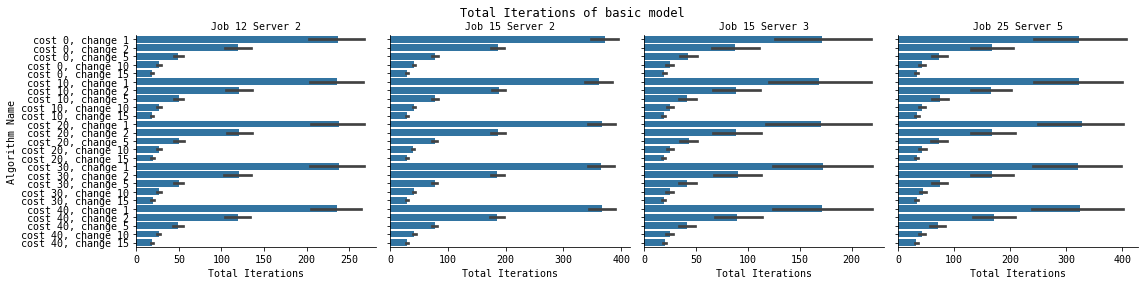

In [12]:
g = sns.FacetGrid(df, col='Model Name', sharex=False, height=4)
g = g.map(sns.barplot, x_axis, "Algorithm Name").set_titles("{col_name}")

g.fig.subplots_adjust(top=0.88)
g.fig.suptitle(title)

g

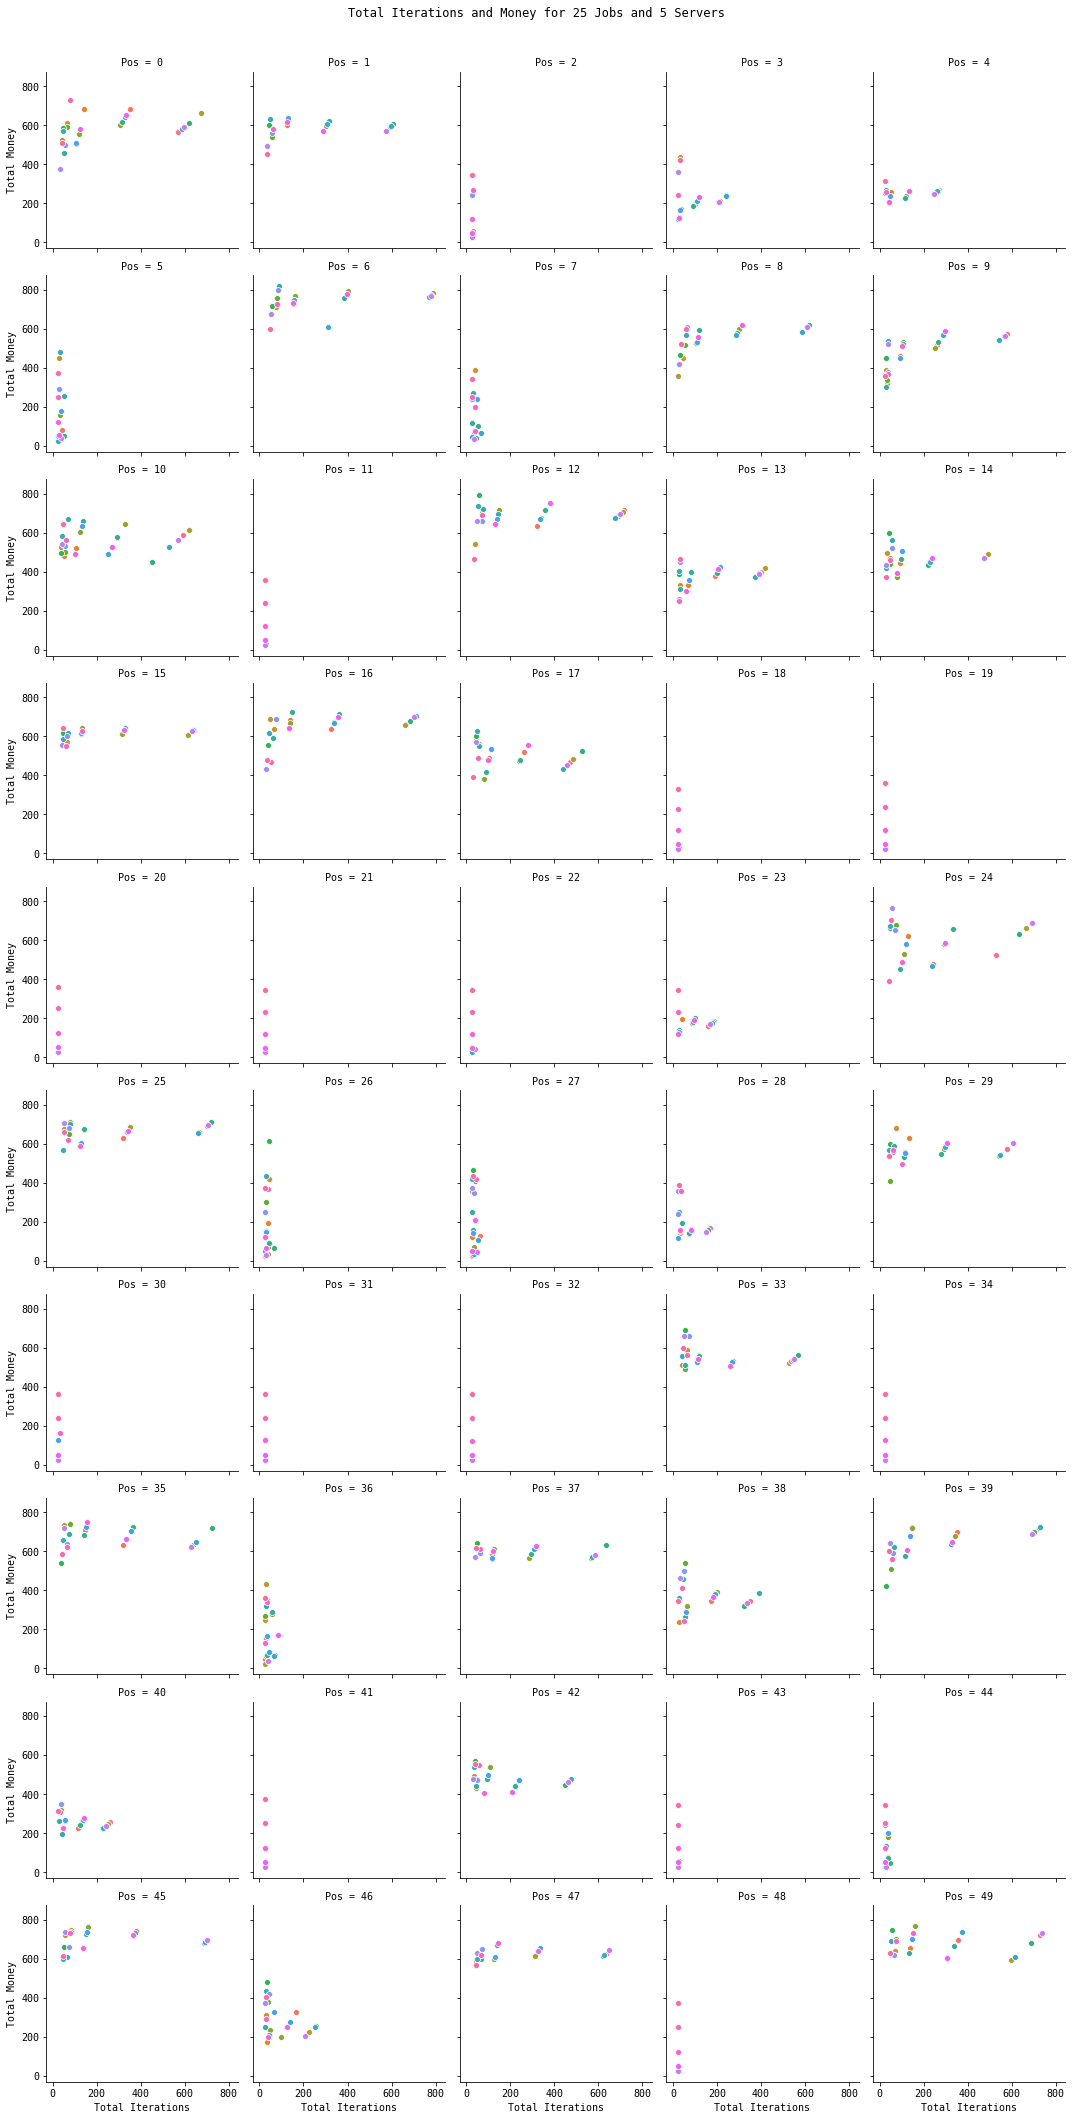

In [16]:
df1 = df.loc[df['Model Name'] == 'Job 25 Server 5']

g = sns.FacetGrid(df1, col='Pos', col_wrap=5, hue='Algorithm Name')
g = g.map(sns.scatterplot, 'Total Iterations', 'Total Money')

g.fig.subplots_adjust(top=0.95)
g.fig.suptitle("Total Iterations and Money for 25 Jobs and 5 Servers")

g